# Algoritmo de clostering para etiquetar sonidos

importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D


Lectura del archivo de sonidos con pandas y previsualización de los registros

In [3]:
dataframe = pd.read_csv(r"sonidos.csv")
dataframe.head()

,frecuencia1,ugen1,frecuencia2,ugen2,frecuencia3,ugen3
0,12459,5,9835,7,7145,11
1,6337,10,19822,11,16571,5
2,2318,2,15937,4,7328,6
3,15869,1,1994,4,11917,3
4,10846,9,12901,8,9662,4


Se visualiza una tabla de información estadística de nuestros datos con la ayuda de pandas

In [4]:
dataframe.describe()

,frecuencia1,ugen1,frecuencia2,ugen2,frecuencia3,ugen3
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,10011.588385,5.537538,9980.192462,5.462231,10029.725769,5.531538
std,5754.260307,3.454692,5755.379177,3.457872,5744.603904,3.453772
min,20.000000,0.000000,20.000000,0.000000,21.000000,0.000000
25%,5023.500000,3.000000,4968.250000,2.000000,5016.000000,3.000000
50%,9979.500000,6.000000,10066.500000,5.000000,10057.000000,6.000000
75%,14955.250000,9.000000,14918.500000,8.000000,14962.750000,9.000000
max,19999.000000,11.000000,19998.000000,11.000000,19995.000000,11.000000


Usamos la función groupby con el fin de saber cuántos registros para cada valor de las columnas (en este caso para la columna ugen1) con el fin de saber si los datos están equilibrados

In [5]:
print(dataframe.groupby('ugen1').size())


ugen1
0     1091
1     1078
2     1035
3     1040
4     1100
5     1062
6     1124
7     1069
8     1103
9     1127
10    1065
11    1106
dtype: int64


## Visualización de Datos

Se grafican las distribuciones de los datos para cada columna, con el fin de analizar posibles patrones

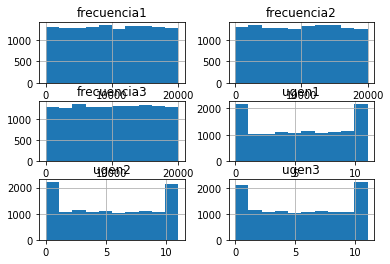

In [6]:
dataframe.drop([],1).hist()
plt.show()

## Definición de la entrada

Se determina la estructura de los datos que se usarán para alimentar el algoritmo, para este caso se ha decidido usar todas las columnas

In [7]:
X = np.array(dataframe[["frecuencia1","ugen1","frecuencia2","ugen2","frecuencia3","ugen3"]])
X.shape

(13000, 6)

## Obtener el valor K

Se trata de determinar el valor de K haciendo una gráfica e intentando hallar el “punto de codo”

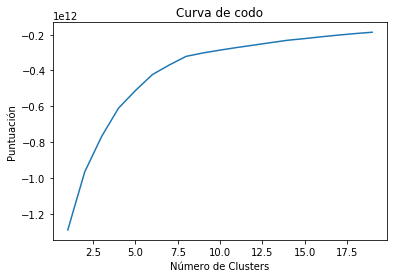

In [8]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.title('Curva de codo')
plt.show()

Aunque la curva es bastante suave se determina que 2 es un buen valor para el número de clusters

## Ejecición de K-Means

Ejecución del algoritmo para 2 clusters y visualización de los centroids.

In [16]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.19653015e+04 5.62326442e+00 1.47924619e+04 5.46497994e+00
  1.51715890e+04 5.48102438e+00]
 [8.07697414e+03 5.46921182e+00 1.43979332e+04 5.37807882e+00
  4.73080511e+03 5.50954433e+00]
 [4.74302306e+03 5.51850728e+00 5.38906341e+03 5.50667476e+00
  1.17304105e+04 5.59890777e+00]
 [1.53978510e+04 5.53965785e+00 5.37271944e+03 5.49891135e+00
  8.45605816e+03 5.53561431e+00]]


Se visualizan los grupos encontrados en una gráfica 3D con las 3 primeras columnas con el fin de ver si se diferencian 

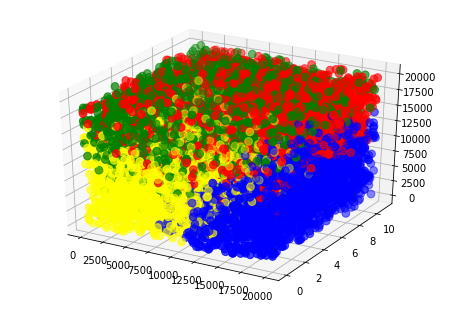

In [22]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','yellow','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

se puede observar que el Algoritmo de K-Means con K=2 ha agrupado a los 10000 sonidos, teniendo en cuenta las 3 primeras columnas del dataset: frecuencia1, ugen1 y frecuencia2. Se puede observar una clara agrupación de los datos en 2 regiones.

## Generación de resultados

Finalmente se agrega al dataset original de los sonidos su respectiva clasificación y se guarda en un nuevo archivo .scv

In [23]:
copy =  pd.DataFrame()
copy['frecuencia1']=dataframe['frecuencia1'].values
copy['ugen1']=dataframe['ugen1'].values
copy['frecuencia2']=dataframe['frecuencia2'].values
copy['ugen2']=dataframe['ugen2'].values
copy['frecuencia3']=dataframe['frecuencia3'].values
copy['ugen3']=dataframe['ugen3'].values
copy['clase'] = labels;

sonidosEntrenamiento=copy.head(10000)
sonidosPruebas=copy.tail(3000)

sonidosEntrenamiento.to_csv("sonidosEtiquetados.csv", index=False)
sonidosPruebas.to_csv("sonidosEtiquetadosPrueba.csv", index=False)
#copy.head()
#sonidosEntrenamiento.head()

## Clasificar nuevas muestras

Este algoritmo también permite hacer nuevas clasificación; sin embargo el objetivo es usar los sonidos etiquetados para entrenar un modelo de clasificación de machine learning

In [24]:
X_new = np.array([[10285,2,10089,5,17702,9]]) 

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
